# Optimal Location for Opening a Restaurant by Motorino 
## (Italian Restaurant)
## Project 1

In [2]:
# library for data analsysis
import numpy as np 
import pandas as pd
import hvplot.pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns

# library to handle JSON files
import json

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium 

import warnings
warnings.filterwarnings('ignore')

#Library for load .env file
from dotenv import load_dotenv

import os


In [3]:
# Load .env enviroment variables
load_dotenv(dotenv_path=".env")


True

In [4]:
# load the Toronto Geo data
df = pd.read_csv('Resurces/toronto_geo.csv')
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [5]:
# load the Toronto census data
df_pop = pd.read_csv('Resurces/toronto_profile.csv')
df_pop.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [8]:
# drop NaN from the data
df_pop.dropna()
df_pop_corr=df_pop.drop(['Neighbourhood Number', '    South Asian', '    Chinese', '    Black', '    Filipino', '    Latin American', '    Arab', '    Southeast Asian', '    West Asian', '    Korean', '    Japanese', 'White'],axis=1)
correlation1 = df_pop_corr.corr()
correlation1

,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over"
"Population, 2016",1.000000,0.453020,0.749536,0.949319,0.612214,0.734429,0.748079,0.814260,0.894894,0.941227,0.944336,0.956500,0.953592,0.960383,0.968660,0.957367,0.949662,0.950068,0.943889,0.861043,0.945748,0.931749,0.883478,0.520317
Population density per square kilometre,0.453020,1.000000,-0.000083,0.574629,0.436238,0.664941,0.732015,0.669485,0.639296,0.563284,0.562430,0.560807,0.557785,0.569685,0.544633,0.540201,0.531651,0.521986,0.523357,0.478825,0.494053,0.473617,0.478380,0.348934
Land area in square kilometres,0.749536,-0.000083,1.000000,0.585907,0.233535,0.286823,0.305225,0.385639,0.483846,0.566253,0.592284,0.617737,0.614539,0.624595,0.644428,0.628669,0.624005,0.628089,0.625594,0.559512,0.650886,0.652712,0.589600,0.273089
Total - Household total income groups in 2015,0.949319,0.574629,0.585907,1.000000,0.733463,0.861641,0.863000,0.875334,0.937615,0.937906,0.929097,0.942225,0.945661,0.956240,0.971704,0.983510,0.984807,0.986618,0.985163,0.933777,0.980093,0.969451,0.946871,0.632132
"Under $5,000",0.612214,0.436238,0.233535,0.733463,1.000000,0.832451,0.709027,0.651126,0.657392,0.676084,0.619396,0.616962,0.606146,0.627464,0.649143,0.679064,0.694457,0.696119,0.687675,0.659840,0.673467,0.660553,0.647576,0.491195
"$5,000 to $9,999",0.734429,0.664941,0.286823,0.861641,0.832451,1.000000,0.967099,0.885713,0.872209,0.835423,0.802468,0.802155,0.795974,0.797428,0.800987,0.815974,0.816573,0.812744,0.811458,0.737295,0.792626,0.772054,0.753081,0.477015
"$10,000 to $14,999",0.748079,0.732015,0.305225,0.863000,0.709027,0.967099,1.000000,0.935139,0.917866,0.861625,0.843048,0.838926,0.834326,0.832000,0.820761,0.823099,0.813956,0.808864,0.805828,0.724613,0.785742,0.763695,0.749925,0.453694
"$15,000 to $19,999",0.814260,0.669485,0.385639,0.875334,0.651126,0.885713,0.935139,1.000000,0.956447,0.931713,0.913991,0.904672,0.894273,0.888662,0.870515,0.856485,0.839384,0.830415,0.818869,0.703372,0.798328,0.769993,0.737056,0.388653
"$20,000 to $24,999",0.894894,0.639296,0.483846,0.937615,0.657392,0.872209,0.917866,0.956447,1.000000,0.970325,0.972252,0.968164,0.963866,0.960389,0.945824,0.932711,0.915983,0.909323,0.898764,0.780262,0.880604,0.852358,0.814460,0.437986
"$25,000 to $29,999",0.941227,0.563284,0.566253,0.937906,0.676084,0.835423,0.861625,0.931713,0.970325,1.000000,0.990585,0.984646,0.979607,0.976772,0.965709,0.946877,0.932055,0.922272,0.908409,0.767854,0.892623,0.859648,0.801241,0.397966


<AxesSubplot:>

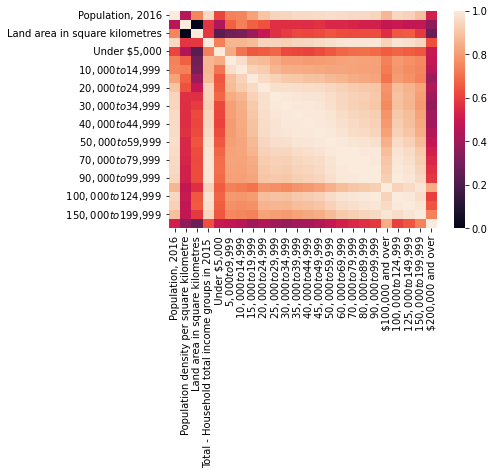

In [9]:
sns.heatmap(correlation1, vmin=0, vmax=1)

## Calculate Spending power

In [10]:
# Inital all variables 
PostCode = []
Borough=[]
Neighborhood=[]
Population=[]
Longitude = []
Latitude = []
P_density = []
Area = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
P9 = []
P10 = []
P11 = []
P12 = []
P13 = []
P14 = []
P15 = []
P16 = []
P17 = []
P18 = []
P19 = []
P20 = []
South_Asian = []
Chinese = []
Black = []
Filipino = []
Latin_American = []
Arab = []
Southeast_Asian =[]
West_Asian = []
Korean = []
Japanese = []
White = []
SP = []


#Calculate Spending Power for each Nighberhood
for i in df['PostalCode']:
    if df_pop['PostalCode'].isin([i]).any():
        PostCode.append(i)
        loc = df.index[df['PostalCode']==i]
        Borough.append(df['Borough'][loc].values[0])
        Neighborhood.append(df['Neighborhood'][loc].values[0])
        Latitude.append(df['Latitude'][loc].values[0])
        Longitude.append(df['Longitude'][loc].values[0])
        loc = df_pop.index[df_pop['PostalCode']==i]
        Population.append(df_pop['Population, 2016'][loc].values[0])
        P_density.append(df_pop['Population density per square kilometre'][loc].values[0])
        Area.append(df_pop['Land area in square kilometres'][loc].values[0])
        p1=(df_pop['  Under $5,000'][loc].values[0])
        p2=(df_pop['  $5,000 to $9,999'][loc].values[0])
        p3=(df_pop['  $10,000 to $14,999'][loc].values[0])
        p4=(df_pop['  $15,000 to $19,999'][loc].values[0])
        p5=(df_pop['  $20,000 to $24,999'][loc].values[0])
        p6=(df_pop['  $25,000 to $29,999'][loc].values[0])
        p7=(df_pop['  $30,000 to $34,999'][loc].values[0])
        p8=(df_pop['  $35,000 to $39,999'][loc].values[0])
        p9=(df_pop['  $40,000 to $44,999'][loc].values[0])
        p10=(df_pop['  $45,000 to $49,999'][loc].values[0])
        p11=(df_pop['  $50,000 to $59,999'][loc].values[0])
        p12=(df_pop['  $60,000 to $69,999'][loc].values[0])
        p13=(df_pop['  $70,000 to $79,999'][loc].values[0])
        p14=(df_pop['  $80,000 to $89,999'][loc].values[0])
        p15=(df_pop['  $90,000 to $99,999'][loc].values[0])
        p16=(df_pop['  $100,000 and over'][loc].values[0])
        p17=(df_pop['    $100,000 to $124,999'][loc].values[0])
        p18=(df_pop['    $125,000 to $149,999'][loc].values[0])
        p19=(df_pop['    $150,000 to $199,999'][loc].values[0])
        p20=(df_pop['    $200,000 and over'][loc].values[0])
        South_Asian.append(df_pop['    South Asian'][loc].values[0])
        Chinese.append(df_pop['    Chinese'][loc].values[0])
        Black.append(df_pop['    Black'][loc].values[0])
        Filipino.append(df_pop['    Filipino'][loc].values[0])
        Latin_American.append(df_pop['    Latin American'][loc].values[0])
        Arab.append(df_pop['    Arab'][loc].values[0])
        Southeast_Asian.append(df_pop['    Southeast Asian'][loc].values[0])
        West_Asian.append(df_pop['    West Asian'][loc].values[0])
        Korean.append(df_pop['    Korean'][loc].values[0])
        Japanese.append(df_pop['    Japanese'][loc].values[0])
        White.append(df_pop['White'][loc].values[0])
        sp = 5000*p1+7500*p2+12500*p3+17500*p4+22500*p5+27500*p6+32500*p7+37500*p8+42500*p9+\
        47500*p10+55000*p11+65000*p12+75000*p13+85000*p14+95000*p15+112500*p17+137500*p18+\
        175000*p19+200000*p20
        P1.append(p1)
        P2.append(p2)
        P3.append(p3)
        P4.append(p4)
        P5.append(p5)
        P6.append(p6)
        P7.append(p7)
        P8.append(p8)
        P9.append(p9)
        P10.append(p10)
        P11.append(p11)
        P12.append(p12)
        P13.append(p13)
        P14.append(p14)
        P15.append(p15)
        P16.append(p16)
        P17.append(p17)
        P18.append(p18)
        P19.append(p19)
        P20.append(p20)
        SP.append(sp)


In [11]:
len(SP)

87

### Create a new DataFrame by combining the two DataFrames

In [13]:
df_data = pd.DataFrame({'PostCode':PostCode,'Borough':Borough,'Neighborhood':Neighborhood,'Latitude':Latitude,
                        'Longitude':Longitude,'Population':Population,'Density':P_density,'Area':Area,
                       '< 5k':P1,'5k - 10k':P2,'10k - 15k':P3,'15k - 20k':P4,'20k - 25k':P5,'25k - 30k':P6,
                        '30k - 35k':P7,'35k - 40k':P8,'40k - 45k':P9,'45k - 50k':P10,'50k - 60k':P11,
                        '60k - 70k':P12,'70k - 80k':P13,'80k - 90k':P14,'90k - 100k':P15,'100k - 125k':P17,
                        '125k - 150k':P18,'150k - 200k':P19,'> 200k':P20, 'South Asian':South_Asian,
                       'Chinese':Chinese,'Black':Black,'Filipino':Filipino,'Latin American':Latin_American,
                       'Arab':Arab,'Southeast Asian':Southeast_Asian,'West Asian':West_Asian,'Korean':Korean,
                       'Japanese':Japanese,'White':White,'Spending Power':SP})

df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,2.331712e+09
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,3.970375e+08
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,1.511462e+09
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,1.240412e+09
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,7.651875e+08


### Standardize the Spending Power

In [14]:
df_data["Spending Power"] = (df_data["Spending Power"]-df_data["Spending Power"].mean())/df_data["Spending Power"].std()

df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461


In [15]:
df_sort_sp=df_data.sort_values(by='Spending Power', ascending=False)
df_sort_sp.hvplot.bar(
    x="PostCode", 
    y="Spending Power", 
    title='Normalized Spending Power',
    xlabel="Neighborhood", 
    ylabel="Spending Power",
    rot=90, width=800, legend='top_right'
)

:Bars   [PostCode]   (Spending Power)

In [16]:
df_sort_sp.head(10)

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
46,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132
79,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,105450.0,14937.0,26.38,2540.0,970.0,1255.0,1710.0,1535.0,1730.0,1555.0,1630.0,1575.0,1615.0,3220.0,3060.0,2825.0,2625.0,2315.0,4420.0,2955.0,3385.0,4540.0,6.68,14.15,3.55,2.10,2.05,1.45,0.85,4.62,5.36,0.75,55.89,3.748670
70,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,82712.0,26438.0,10.51,900.0,755.0,1255.0,1655.0,1605.0,1435.0,1390.0,1460.0,1465.0,1400.0,2680.0,2475.0,2225.0,2125.0,1900.0,3500.0,2425.0,2980.0,3540.0,4.78,5.56,4.63,1.60,3.33,0.66,1.82,0.62,1.31,0.69,71.18,2.841538
21,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,90362.0,19083.0,13.80,2935.0,1010.0,1260.0,1800.0,1510.0,1780.0,1535.0,1400.0,1355.0,1385.0,2590.0,2420.0,2190.0,2020.0,1735.0,3255.0,2120.0,2415.0,2610.0,5.58,27.12,1.95,6.13,1.45,1.65,0.74,11.51,10.51,0.87,29.43,2.350813
38,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,61173.0,17944.0,13.31,575.0,655.0,1100.0,1380.0,1070.0,930.0,970.0,920.0,875.0,820.0,1555.0,1510.0,1285.0,1230.0,1160.0,2360.0,1805.0,2650.0,3440.0,5.88,10.88,4.94,2.39,1.20,0.51,1.03,0.54,0.65,0.84,66.80,1.843853
59,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,48217.0,22824.0,6.28,680.0,460.0,750.0,930.0,845.0,795.0,780.0,820.0,865.0,925.0,1820.0,1870.0,1805.0,1720.0,1495.0,2840.0,1960.0,2225.0,2595.0,4.46,7.26,3.51,2.77,2.00,0.80,1.33,0.86,0.88,0.98,71.49,1.784416
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
14,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,86468.0,12552.0,19.96,540.0,375.0,560.0,1320.0,1005.0,1440.0,1320.0,1305.0,1260.0,1205.0,2350.0,2080.0,1925.0,1675.0,1495.0,2885.0,2090.0,2140.0,1590.0,17.75,32.86,6.64,5.47,0.79,1.50,0.65,0.99,0.33,0.39,29.13,1.712083
41,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433.0,27380.0,4.45,920.0,550.0,860.0,1290.0,980.0,865.0,820.0,910.0,955.0,950.0,1915.0,1745.0,1555.0,1400.0,1200.0,2105.0,1395.0,1725.0,2835.0,5.22,5.50,3.40,2.99,2.45,0.87,0.34,2.63,1.97,0.84,70.91,1.450377
77,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509,52434.0,12621.0,15.10,360.0,235.0,445.0,655.0,800.0,780.0,805.0,770.0,835.0,855.0,1610.0,1430.0,1295.0,1100.0,995.0,1975.0,1370.0,1750.0,3155.0,5.34,2.49,4.71,2.90,3.24,0.84,0.92,1.17,1.72,0.50,72.28,1.325237


In [17]:
df_sort_dens=df_data.sort_values(by='Density', ascending=False)
df_sort_dens.hvplot.bar(
    x="PostCode", 
    y="Density", 
    title="Population Density",
    xlabel="Neighborhood", 
    ylabel="Density",
    rot=90, width=800, legend='top_right'
)

:Bars   [PostCode]   (Density)

In [18]:
df_sort_dens.hvplot.bar(
    x="PostCode", 
    y=["Density","Spending Power"],
    title="Population Density",
    xlabel="Neighborhood", 
    ylabel="Density",
    stacked=True, rot=90, width=800, legend='top_right'
)

:Bars   [PostCode,Variable]   (value)

In [19]:
df_sort_dens.head(10)

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
45,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,30284.0,52656.0,1.82,615.0,610.0,1095.0,1435.0,900.0,820.0,785.0,760.0,705.0,745.0,1240.0,1020.0,875.0,695.0,610.0,1005.0,595.0,635.0,870.0,12.38,5.48,7.87,9.60,2.77,1.53,1.26,1.24,1.28,0.38,49.80,0.002739
41,M4P,Central Toronto,Davisville North,43.712751,-79.390197,46433.0,27380.0,4.45,920.0,550.0,860.0,1290.0,980.0,865.0,820.0,910.0,955.0,950.0,1915.0,1745.0,1555.0,1400.0,1200.0,2105.0,1395.0,1725.0,2835.0,5.22,5.50,3.40,2.99,2.45,0.87,0.34,2.63,1.97,0.84,70.91,1.450377
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,56512.0,26604.0,10.30,480.0,580.0,1000.0,1160.0,1095.0,1135.0,1155.0,1110.0,1140.0,1055.0,1790.0,1545.0,1270.0,1095.0,975.0,1735.0,1005.0,1045.0,465.0,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57,0.474186
70,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,82712.0,26438.0,10.51,900.0,755.0,1255.0,1655.0,1605.0,1435.0,1390.0,1460.0,1465.0,1400.0,2680.0,2475.0,2225.0,2125.0,1900.0,3500.0,2425.0,2980.0,3540.0,4.78,5.56,4.63,1.60,3.33,0.66,1.82,0.62,1.31,0.69,71.18,2.841538
46,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132
59,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,48217.0,22824.0,6.28,680.0,460.0,750.0,930.0,845.0,795.0,780.0,820.0,865.0,925.0,1820.0,1870.0,1805.0,1720.0,1495.0,2840.0,1960.0,2225.0,2595.0,4.46,7.26,3.51,2.77,2.00,0.80,1.33,0.86,0.88,0.98,71.49,1.784416
65,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,32115.0,22429.0,2.94,380.0,255.0,465.0,550.0,600.0,550.0,610.0,610.0,585.0,560.0,1115.0,985.0,910.0,860.0,765.0,1410.0,915.0,1080.0,1145.0,2.28,14.35,3.02,1.04,2.04,0.37,1.55,0.43,0.78,0.63,69.14,0.238289
21,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,90362.0,19083.0,13.80,2935.0,1010.0,1260.0,1800.0,1510.0,1780.0,1535.0,1400.0,1355.0,1385.0,2590.0,2420.0,2190.0,2020.0,1735.0,3255.0,2120.0,2415.0,2610.0,5.58,27.12,1.95,6.13,1.45,1.65,0.74,11.51,10.51,0.87,29.43,2.350813
38,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,61173.0,17944.0,13.31,575.0,655.0,1100.0,1380.0,1070.0,930.0,970.0,920.0,875.0,820.0,1555.0,1510.0,1285.0,1230.0,1160.0,2360.0,1805.0,2650.0,3440.0,5.88,10.88,4.94,2.39,1.20,0.51,1.03,0.54,0.65,0.84,66.80,1.843853
64,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,26134.0,17081.0,3.06,245.0,215.0,375.0,705.0,585.0,510.0,530.0,515.0,490.0,470.0,815.0,800.0,670.0,585.0,520.0,950.0,670.0,780.0,875.0,3.71,6.39,5.54,2.26,3.63,0.71,1.57,0.38,0.98,0.47,67.75,-0.159056


### Find the coordinates of Toronto

In [20]:
address = 'Toronto'
geolocator = Nominatim(user_agent='Richmond Hill')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Create a map to visualize the location of the different postal codes

In [21]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, size in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood'], df_data['Spending Power']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=size*5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_toronto)  
    
map_toronto

### Foursquare API Credentials

In [22]:
api_key = os.getenv("API_KEY")

categories=13000
radius=5000

### Function to look up top 50 places within 5,000 meters of coordinates

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                                
        # create the API request URL      
        url = "https://api.foursquare.com/v3/places/search?query={}&ll={},{}&radius={}&categories={}&limit={}".format(
            name,
            lat, 
            lng, 
            radius,
            categories,
            LIMIT)
        headers = {
                    "Accept": "application/json",
                    "Authorization": "fsq335JRganJSokWaKKdXHUdSj7tKoXwGkFBosbVglKESdM="
                  }

        results = requests.get(url, headers=headers).json()["results"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['geocodes']['main']['latitude'], 
            v['geocodes']['main']['longitude'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
LIMIT = 50

venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview Central
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, Riverdale
The Beaches West, India Baz

In [25]:
print(venues.shape)
venues.head()

(1128, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Rouge Bakery,43.801068,-79.199202,Bakery
1,"Rouge, Malvern",43.806686,-79.194353,Rouge Park Pie Stand,43.838836,-79.163082,Pie Shop
2,"Rouge, Malvern",43.806686,-79.194353,Rouge Bakery,43.782086,-79.175160,Bakery
3,"Rouge, Malvern",43.806686,-79.194353,Malvern Pizza,43.795876,-79.227233,Restaurant
4,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Highland Harvest,43.784349,-79.169370,Café


In [26]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",8,8,8,8,8,8
Agincourt,1,1,1,1,1,1
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",6,6,6,6,6,6
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",49,49,49,49,49,49
"Alderwood, Long Branch",5,5,5,5,5,5
"Bathurst Manor, Downsview North, Wilson Heights",5,5,5,5,5,5
Bayview Village,50,50,50,50,50,50
"Bedford Park, Lawrence Manor East",6,6,6,6,6,6
"Birch Cliff, Cliffside West",5,5,5,5,5,5


In [27]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 94 uniques categories.


### One hot encode the unique categories 

In [28]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Amusement Park,Arts and Entertainment,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Restaurant,"Cafes, Coffee, and Tea Houses",Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Creperie,Deli,Dessert Shop,Diner,Dining and Drinking,Dive Bar,Donut Shop,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish and Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,Gay Bar,Greek Restaurant,Halal Restaurant,Hookah Bar,Hot Dog Joint,Hotel Bar,Ice Cream Parlor,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Malay Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue,New American Restaurant,Night Club,Noodle Restaurant,Pastry Shop,Persian Restaurant,Pie Shop,Pizzeria,Pool Hall,Pub,Ramen Restaurant,Restaurant,Sandwich Restaurant,Seafood Restaurant,South Indian Restaurant,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
venues_onehot.shape

(1128, 95)

In [30]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,African Restaurant,American Restaurant,Amusement Park,Arts and Entertainment,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Restaurant,"Cafes, Coffee, and Tea Houses",Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Creperie,Deli,Dessert Shop,Diner,Dining and Drinking,Dive Bar,Donut Shop,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish and Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,Gay Bar,Greek Restaurant,Halal Restaurant,Hookah Bar,Hot Dog Joint,Hotel Bar,Ice Cream Parlor,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Malay Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Music Venue,New American Restaurant,Night Club,Noodle Restaurant,Pastry Shop,Persian Restaurant,Pie Shop,Pizzeria,Pool Hall,Pub,Ramen Restaurant,Restaurant,Sandwich Restaurant,Seafood Restaurant,South Indian Restaurant,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar
0,"Adelaide, King, Richmond",0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agincourt,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",1,1,0,0,2,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,"Alderwood, Long Branch",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,"Bathurst Manor, Downsview North, Wilson Heights",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bayview Village,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,0,0,3,0,3,0,4,0,5,0,0,0,1,0,0,4,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,10,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0
7,"Bedford Park, Lawrence Manor East",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,"Birch Cliff, Cliffside West",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                      venue  freq
0                     Diner   2.0
1              Cocktail Bar   1.0
2       American Restaurant   1.0
3                 Hotel Bar   1.0
4              Concert Hall   1.0
5                Restaurant   1.0
6      Brazilian Restaurant   1.0
7  Mediterranean Restaurant   0.0
8               Pastry Shop   0.0
9         Noodle Restaurant   0.0


----Agincourt----
                       venue  freq
0                     Bakery   1.0
1         African Restaurant   0.0
2        Lebanese Restaurant   0.0
3                Pastry Shop   0.0
4          Noodle Restaurant   0.0
5                 Night Club   0.0
6    New American Restaurant   0.0
7                Music Venue   0.0
8  Middle Eastern Restaurant   0.0
9   Mediterranean Restaurant   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                     venue  freq
0                   Bakery   2.0
1                      Pub   1.0
2                    D

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Diner,Cocktail Bar,American Restaurant,Hotel Bar,Concert Hall,Restaurant,Brazilian Restaurant,Mediterranean Restaurant,Pastry Shop,Noodle Restaurant
1,Agincourt,Bakery,African Restaurant,Lebanese Restaurant,Pastry Shop,Noodle Restaurant,Night Club,New American Restaurant,Music Venue,Middle Eastern Restaurant,Mediterranean Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Bakery,Pub,Diner,Fast Food Restaurant,Bubble Tea Shop,African Restaurant,Lounge,Noodle Restaurant,Night Club,New American Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Restaurant,Fast Food Restaurant,Coffee Shop,Indian Restaurant,Bakery,Asian Restaurant,South Indian Restaurant,Ice Cream Parlor,American Restaurant,Fried Chicken Joint
4,"Alderwood, Long Branch",Sports Bar,Asian Restaurant,Deli,Restaurant,Fish and Chips Shop,African Restaurant,Night Club,New American Restaurant,Music Venue,Middle Eastern Restaurant


In [34]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'African Restaurant',
 'American Restaurant',
 'Amusement Park',
 'Arts and Entertainment',
 'Asian Restaurant',
 'Australian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Beer Bar',
 'Bistro',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Restaurant',
 'Cafes, Coffee, and Tea Houses',
 'Café',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Cocktail Bar',
 'Coffee Shop',
 'Colombian Restaurant',
 'Comedy Club',
 'Concert Hall',
 'Creperie',
 'Deli',
 'Dessert Shop',
 'Diner',
 'Dining and Drinking',
 'Dive Bar',
 'Donut Shop',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'Fish and Chips Shop',
 'Food Court',
 'Food Truck',
 'French Restaurant',
 'Fried Chicken Joint',
 'Frozen Yogurt Shop',
 'Gastropub',
 'Gay Bar',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hookah Bar',
 'H

### Calculate the total number of restaurants in each region

In [35]:
total_restaurants = venues_grouped['African Restaurant']+ venues_grouped['American Restaurant']+venues_grouped['Amusement Park']+\
venues_grouped['Arts and Entertainment']+venues_grouped['Asian Restaurant']+venues_grouped['Australian Restaurant']+\
venues_grouped['BBQ Joint']+venues_grouped['Bagel Shop']+venues_grouped['Bakery']+venues_grouped['Bar']+\
venues_grouped['Beer Bar']+venues_grouped['Bistro']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Brewery']+venues_grouped['Bubble Tea Shop']+venues_grouped['Buffet']+\
venues_grouped['Burger Joint']+venues_grouped['Burrito Restaurant']+venues_grouped['Cafes, Coffee, and Tea Houses']+\
venues_grouped['Café']+venues_grouped['Cajun / Creole Restaurant']+venues_grouped['Cantonese Restaurant']+\
venues_grouped['Caribbean Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Cocktail Bar']+\
venues_grouped['Coffee Shop']+venues_grouped['Colombian Restaurant']+venues_grouped['Comedy Club']+\
venues_grouped['Concert Hall']+venues_grouped['Creperie']+venues_grouped['Deli']+venues_grouped['Dessert Shop']+\
venues_grouped['Diner']+venues_grouped['Dining and Drinking']+venues_grouped['Dive Bar']+venues_grouped['Donut Shop']+\
venues_grouped['Ethiopian Restaurant']+venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+\
venues_grouped['Filipino Restaurant']+venues_grouped['Fish and Chips Shop']+venues_grouped['Food Court']+\
venues_grouped['Food Truck']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['Frozen Yogurt Shop']+venues_grouped['Gastropub']+venues_grouped['Gay Bar']+venues_grouped['Greek Restaurant']+\
venues_grouped['Halal Restaurant']+venues_grouped['Hookah Bar']+venues_grouped['Hot Dog Joint']+\
venues_grouped['Hotel Bar']+venues_grouped['Ice Cream Parlor']+venues_grouped['Indian Restaurant']+\
venues_grouped['Italian Restaurant']+venues_grouped['Japanese Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Lebanese Restaurant']+ venues_grouped['Lounge']+\
venues_grouped['Malay Restaurant']+ venues_grouped['Mediterranean Restaurant']+\
venues_grouped['Middle Eastern Restaurant']+venues_grouped['Music Venue']+venues_grouped['New American Restaurant']+\
venues_grouped['Night Club']+ venues_grouped['Noodle Restaurant']+venues_grouped['Pastry Shop']+\
venues_grouped['Persian Restaurant']+venues_grouped['Pie Shop']+venues_grouped['Pizzeria']+venues_grouped['Pool Hall']+\
venues_grouped['Pub']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+venues_grouped['Sandwich Restaurant']+\
venues_grouped['Seafood Restaurant']+venues_grouped['South Indian Restaurant']+venues_grouped['Speakeasy']+\
venues_grouped['Sports Bar']+venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+\
venues_grouped['Szechuan Restaurant']+venues_grouped['Taco Restaurant']+venues_grouped['Taiwanese Restaurant']+\
venues_grouped['Tapas Restaurant']+venues_grouped['Tea Room']+venues_grouped['Thai Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Vegan and Vegetarian Restaurant']+\
venues_grouped['Vietnamese Restaurant']+venues_grouped['Wine Bar']

In [36]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Italian Restaurant':venues_grouped['Italian Restaurant']})
df_restaurants.head(30)

,Neighborhood,Total Restaurants,Italian Restaurant
0,"Adelaide, King, Richmond",8,0
1,Agincourt,1,0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",6,0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",49,0
4,"Alderwood, Long Branch",5,0
5,"Bathurst Manor, Downsview North, Wilson Heights",5,0
6,Bayview Village,50,0
7,"Bedford Park, Lawrence Manor East",6,0
8,"Birch Cliff, Cliffside West",5,0
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",1,0


In [37]:
df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461


In [38]:
venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Diner,Cocktail Bar,American Restaurant,Hotel Bar,Concert Hall,Restaurant,Brazilian Restaurant,Mediterranean Restaurant,Pastry Shop,Noodle Restaurant
1,Agincourt,Bakery,African Restaurant,Lebanese Restaurant,Pastry Shop,Noodle Restaurant,Night Club,New American Restaurant,Music Venue,Middle Eastern Restaurant,Mediterranean Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Bakery,Pub,Diner,Fast Food Restaurant,Bubble Tea Shop,African Restaurant,Lounge,Noodle Restaurant,Night Club,New American Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Restaurant,Fast Food Restaurant,Coffee Shop,Indian Restaurant,Bakery,Asian Restaurant,South Indian Restaurant,Ice Cream Parlor,American Restaurant,Fried Chicken Joint
4,"Alderwood, Long Branch",Sports Bar,Asian Restaurant,Deli,Restaurant,Fish and Chips Shop,African Restaurant,Night Club,New American Restaurant,Music Venue,Middle Eastern Restaurant


### Combine the two dataFrames to get the final data

In [39]:
# Create the final data frame that will be analyzed using clustering
df_final = pd.merge(df_data,df_restaurants,on='Neighborhood')
df_final.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power,Total Restaurants,Italian Restaurant
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524,4,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399,6,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610,5,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102,1,0
4,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,16724.0,5395.0,3.10,105.0,180.0,305.0,330.0,325.0,345.0,370.0,345.0,325.0,355.0,570.0,420.0,355.0,300.0,220.0,410.0,240.0,230.0,195.0,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13,-0.832936,50,1


In [40]:
df_final.columns.values.tolist()

['PostCode',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Population',
 'Density',
 'Area',
 '< 5k',
 '5k - 10k',
 '10k - 15k',
 '15k - 20k',
 '20k - 25k',
 '25k - 30k',
 '30k - 35k',
 '35k - 40k',
 '40k - 45k',
 '45k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k - 100k',
 '100k - 125k',
 '125k - 150k',
 '150k - 200k',
 '> 200k',
 'South Asian',
 'Chinese',
 'Black',
 'Filipino',
 'Latin American',
 'Arab',
 'Southeast Asian',
 'West Asian',
 'Korean',
 'Japanese',
 'White',
 'Spending Power',
 'Total Restaurants',
 'Italian Restaurant']

### Drop columns that wont be used for clustering

In [41]:
df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density','South Asian','Chinese',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)

df_final2=df_final.drop(['South Asian','Chinese',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)
df_final1.head()

,Neighborhood,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
0,"Rouge, Malvern",90290.0,45.74,1.756524,4,0
1,"Highland Creek, Rouge Hill, Port Union",12494.0,5.20,-0.802399,6,0
2,"Guildwood, Morningside, West Hill",54764.0,19.04,0.671610,5,0
3,Woburn,53485.0,12.31,0.313102,1,0
4,Scarborough Village,16724.0,3.10,-0.832936,50,1


In [42]:
correlation3 = df_final1.corr()
correlation3

,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
Population,1.000000,0.790374,0.911275,-0.133997,-0.008021
Area,0.790374,1.000000,0.628666,-0.156824,-0.081633
Spending Power,0.911275,0.628666,1.000000,-0.085535,0.058174
Total Restaurants,-0.133997,-0.156824,-0.085535,1.000000,0.543396
Italian Restaurant,-0.008021,-0.081633,0.058174,0.543396,1.000000


<AxesSubplot:>

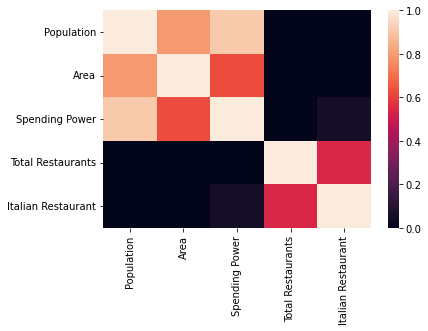

In [44]:
sns.heatmap(correlation3, vmin=0, vmax=1)

In [45]:
df_sort_f=df_final2.sort_values(by='Total Restaurants', ascending=False)
df_sort_f.hvplot.bar(
    x="PostCode", 
    y=["Total Restaurants","Italian Restaurant"], 
    title='Total Restaurants vs Italian Restaurant',
    xlabel="Neighborhood", 
    ylabel="# Restaurants",
    stacked=True, rot=90, width=800, legend='top_right'
)

:Bars   [PostCode,Variable]   (value)

In [46]:
address = 'Toronto'
geolocator = Nominatim(user_agent='Richmond Hill')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [47]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, size,total in zip(df_final2['Latitude'], df_final2['Longitude'], df_final2['Borough'], df_final2['Neighborhood'], df_final2['Spending Power'], df_final2['Total Restaurants']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=total/5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_toronto)  
    folium.CircleMarker(
        [lat, lng],
        radius=size*5,
        color='red',
        fill=True,
        fill_color='#ffffff',
        fill_opacity=0.7,).add_to(map_toronto)  
    
map_toronto

### Run K-Means Clustering with K = 5

In [48]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 1, 3, 3, 1, 1, 0, 1])

In [49]:
# add clustering labels
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)


In [50]:

venues_merged = df_final.loc[:,'PostCode':'Longitude']
venues_merged.head()


,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1J,Scarborough,Scarborough Village,43.744734,-79.239476


In [51]:

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
venues_merged = venues_merged.join(df_final1.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head() # check the last columns!

,PostCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2,90290.0,45.74,1.756524,4,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,3,12494.0,5.20,-0.802399,6,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,54764.0,19.04,0.671610,5,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1,53485.0,12.31,0.313102,1,0
4,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3,16724.0,3.10,-0.832936,50,1


In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged['Italian Restaurant'],venues_merged['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nItalian Restaurant: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 1

In [53]:
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
8,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0,22291.0,5.92,-0.257743,5,0
10,Scarborough,Agincourt,43.794200,-79.262029,0,23757.0,7.83,-0.540925,1,0
11,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,0,27446.0,5.41,-0.372501,2,0
13,Scarborough,"L'Amoreaux West, Steeles West",43.799525,-79.318389,0,24623.0,4.53,-0.524177,1,0
14,Scarborough,Upper Rouge,43.836125,-79.205636,0,30491.0,5.20,-0.487903,2,0
16,North York,Bayview Village,43.786947,-79.385975,0,21396.0,5.10,-0.304615,50,0
17,North York,"Silver Hills, York Mills",43.757490,-79.374714,0,27078.0,16.24,0.261964,21,0
20,North York,Don Mills North,43.745906,-79.352188,0,27695.0,9.98,0.169411,50,0
21,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,0,21933.0,2.43,-0.719039,10,0
23,North York,"Northwood Park, York University",43.767980,-79.487262,0,27593.0,13.23,-0.451927,10,0


## Cluster 2

In [54]:
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]


,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
2,Scarborough,1,54764.0,19.04,0.671610,5,0
3,Scarborough,1,53485.0,12.31,0.313102,1,0
6,Scarborough,1,56512.0,10.30,0.474186,8,0
7,Scarborough,1,55834.0,13.83,0.569401,8,0
9,Scarborough,1,51575.0,15.42,0.245414,17,1
15,North York,1,42774.0,6.80,0.243348,4,0
48,Downtown Toronto,1,48217.0,6.28,1.784416,50,1
55,York,1,39495.0,9.61,0.045180,8,0
59,Etobicoke,1,45427.0,10.34,1.050040,7,1
62,Etobicoke,1,52434.0,15.10,1.325237,50,1


## Cluster 3

In [55]:
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]


,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
0,Scarborough,2,90290.0,45.74,1.756524,4,0
12,Scarborough,2,86468.0,19.96,1.712083,6,0
18,North York,2,90362.0,13.80,2.350813,1,0
57,West Toronto,2,82712.0,10.51,2.841538,15,0
64,Etobicoke,2,105450.0,26.38,3.748670,2,0


## Cluster 4

In [56]:
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]


,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
1,Scarborough,3,12494.0,5.20,-0.802399,6,0
4,Scarborough,3,16724.0,3.10,-0.832936,50,1
5,Scarborough,3,13641.0,1.94,-0.891249,2,0
19,North York,3,16936.0,2.91,-0.558203,1,0
24,North York,3,16164.0,5.32,-0.497079,16,0
25,North York,3,11058.0,1.71,-0.941213,2,0
28,East York,3,16828.0,4.68,-0.262058,2,0
29,East York,3,11499.0,1.70,-0.809310,50,1
31,East Toronto,3,18675.0,4.94,-0.568619,10,0
34,Central Toronto,3,12528.0,1.17,-0.416909,6,0


## Cluster 5

In [57]:
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]


,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
22,North York,4,67397.0,23.84,1.300205,5,0
30,East Toronto,4,61173.0,13.31,1.843853,16,1
36,Downtown Toronto,4,76716.0,8.01,3.838132,4,0
69,Etobicoke,4,65924.0,14.75,0.727046,49,0


## Examine Cluster 4 Further

In [58]:
cluster = venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]
cluster.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Italian Restaurant
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,3,12494.0,5.20,-0.802399,6,0
4,Scarborough,Scarborough Village,43.744734,-79.239476,3,16724.0,3.10,-0.832936,50,1
5,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,3,13641.0,1.94,-0.891249,2,0
19,North York,Willowdale South,43.770120,-79.408493,3,16936.0,2.91,-0.558203,1,0
24,North York,"CFB Toronto, Downsview East",43.737473,-79.464763,3,16164.0,5.32,-0.497079,16,0
25,North York,Downsview Central,43.728496,-79.495697,3,11058.0,1.71,-0.941213,2,0
28,East York,Leaside,43.709060,-79.363452,3,16828.0,4.68,-0.262058,2,0
29,East York,East Toronto,43.685347,-79.338106,3,11499.0,1.70,-0.809310,50,1
31,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,3,18675.0,4.94,-0.568619,10,0
34,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,12528.0,1.17,-0.416909,6,0


Text(0, 0.5, 'Count')

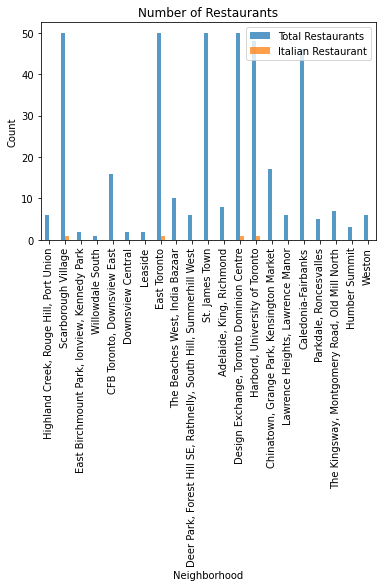

In [59]:
%matplotlib inline

ax = cluster.plot(x='Neighborhood',y=['Total Restaurants','Italian Restaurant'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')


Text(0, 0.5, 'Normalized Spending Power ($)')

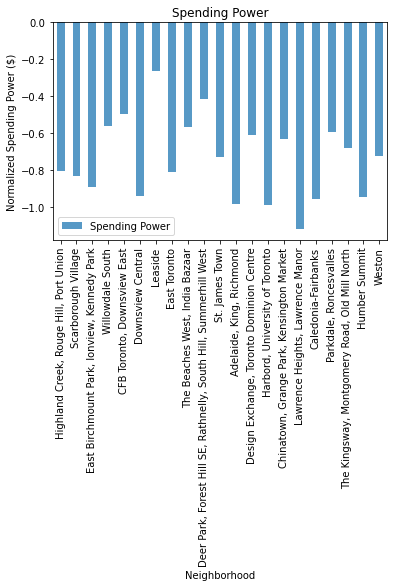

In [60]:
ax = cluster.plot(x='Neighborhood',y=['Spending Power'],kind='bar',alpha=0.75,title='Spending Power')
ax.set_ylabel('Normalized Spending Power ($)')


Text(0, 0.5, 'Population')

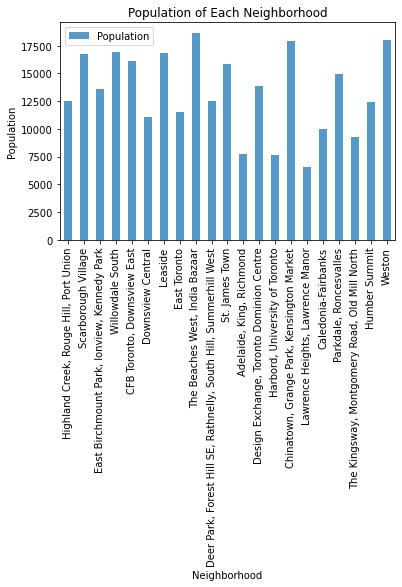

In [61]:
ax = cluster.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood')
ax.set_ylabel('Population')


In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster['Latitude'], cluster['Longitude'], cluster['Neighborhood'], cluster['Cluster Labels'],cluster['Total Restaurants'],cluster['Italian Restaurant'],cluster['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nItalian Restaurant: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters